**LAB-05: KNN Classifier**

---



* Created Date: 21.03.2024
* Created By: Blessy Louis(2348416)
* edited on: 21.03.2024

**Importing necessary packages for Analysis**:


1.   Pandas: Is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data.
2.   Numpy:NumPy enhances Python's mathematical operations on arrays and matrices by providing a powerful data structure, a vast library of high-level functions, and efficient calculations.
3. matplotlib.pyplot: Matplotlib is an amazing visualization library in Python for 2D plots of arrays. Matplotlib is a multi-platform data visualization library built on NumPy arrays.Matplotlib consists of several plots like line, bar, scatter, histogram, etc.
4.  seaborn:Python Seaborn library is a widely popular data visualization library that is commonly used for data science and machine learning tasks. You build it on top of the matplotlib data visualization library and can perform exploratory analysis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load Dataset:**

* **Tweet Id (or Tweet Identity):** This column likely contains unique identifiers for each tweet in the dataset. It might be a numerical ID assigned for tracking purposes.

* **Entity:** This column could potentially hold information about the entity mentioned in the tweet. It's unclear from the sample data what kind of entities are included (e.g., organizations, products, people).

* **Sentiment:** This column indicates the sentiment expressed in the tweet content. In your sample, it has values like "Positive," suggesting the sentiment of the tweet was classified.

* **Tweet Content:** This column contains the actual text content of the tweet. This is the primary data you'll use for sentiment analysis tasks.

In essence, this dataset provides labeled tweet examples where each tweet has an associated sentiment label ("Positive" in your sample). The goal of sentiment analysis using this data would be to train a model that can predict the sentiment of new, unseen tweets based on their content.

In [ ]:
# Load the first CSV file
df1 = pd.read_csv('Tweet_train.csv')






**Displaying first 5 rows of the dataset**

In [ ]:
df1.head()

Tweet Id       entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                       Tweet Content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...

2401 indicates the tweet id , Borderlands in the organization that tweets, sentiment is the grade of whether the tweet is (positive, negative or neutral), tweet content is the actual content posted

In [ ]:
df1.shape

(74682, 4)

The dataset contains  74682 and only 7 features

Data Description: Features in the data

In [ ]:
df1.columns

Index(['Tweet Id', 'entity', 'Sentiment', 'Tweet Content'], dtype='object')

Checking for null values

In [ ]:
df1.isnull().sum()

Tweet Id           0
entity             0
Sentiment          0
Tweet Content    686
dtype: int64

clearly , we see that the dataset have no null values , since the count of the number of null values for each feature is zero.

Displaying the information about the data

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet Id       74682 non-null  int64 
 1   entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet Content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


The DataFrame in Python is a commonly used data structure for tabular data analysis. It has 74682 rows representing tweets, with four columns: tweet Id, entity, sentiment, and content. The DataFrame has 74682 non-null values, with 686 tweets missing content. The "Tweet Content" column has 686 fewer non-null values.

### **Univariate Analysis**

Categorical Variables

In [ ]:
df1['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [ ]:
Scores_freq = df1['Sentiment'].value_counts(normalize=True)
print(Scores_freq)

Negative      0.301840
Positive      0.278943
Neutral       0.245280
Irrelevant    0.173937
Name: Sentiment, dtype: float64


Visualize using bar plots

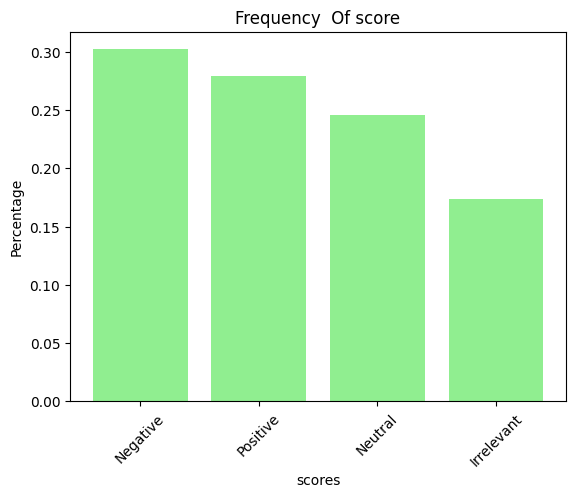

In [ ]:

plt.bar(Scores_freq.index, Scores_freq.values, color='lightgreen')
plt.xlabel('scores')
plt.ylabel('Percentage')
plt.title('Frequency  Of score')
plt.xticks(rotation=45)
plt.show()

The bar plot displays the frequency of scores of student in the dataset, with taller bars indicating higher frequency. It allows easy comparison of areas, revealing their distribution across the dataset. Dominant area with the tallest bars are the most frequent. The x-axis labels are rotated for better readability. This visual representation aids in identifying dominant areas and comparing their frequency across the dataset. Clearly we see that the area of negative has the maximum occurrences in the dataset.

Visualizing using Kernel Density Plot

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=Scores_freq.values, color='orange', shade=True)
plt.xlabel('Frequency')
plt.ylabel('Density')
plt.title('Kernel Density Plot of score')
plt.show()

<ipython-input-11-976beaed4264>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Scores_freq.values, color='orange', shade=True)


The kernel density plot of property are frequencies provides a smooth estimate of the probability density function, revealing the distribution of frequencies. Peaks indicate densely concentrated regions, while the width of the curve indicates data variability. The symmetry of the distribution can be inferred from the shape, with a centered curve and a skewed one. The height of the curve at any point represents the relative density of frequencies. Clearly the distribution of the frequencies maybe almost symmetric and leptokurtic but have longer tails to the left side and the maximum number of data values are clustered with a freequency of 0.20-0.30

Performing sentiment analysis

In [ ]:
from textblob import TextBlob
df1['Tweet Content'] = df1['Tweet Content'].fillna('')
# Define a function for sentiment analysis
def sentiment_analysis(text):
    # Create a TextBlob object
    blob = TextBlob(text)

    # Get the sentiment polarity (-1 for negative, 0 for neutral, 1 for positive)
    sentiment = blob.sentiment.polarity

    # Classify sentiment based on polarity
    if sentiment > 0:
        return 'positive'
    elif sentiment == 0:
        return 'neutral'
    else:
        return 'negative'

In [ ]:
df1['Sentiment'] = df1['Tweet Content'].apply(sentiment_analysis)

# Save the updated dataframe to a new CSV file
df1.to_csv('sentiment_analysis_result.csv', index=False)

Visualize sentiment distribution

<ipython-input-14-3bad742d5060>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df1, palette=colors)
<ipython-input-14-3bad742d5060>:4: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(x='Sentiment', data=df1, palette=colors)


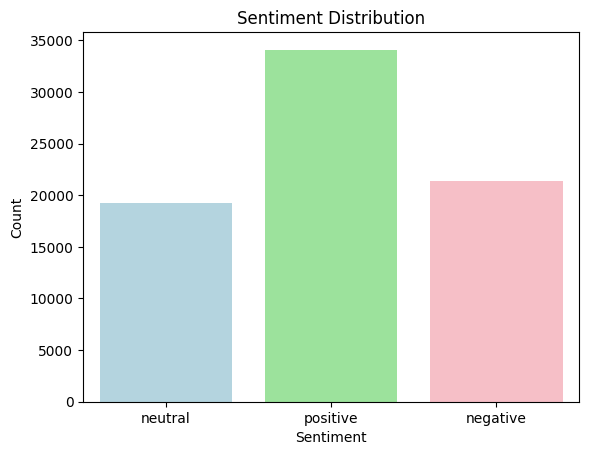

In [ ]:
colors = ["lightblue", "lightgreen", "lightpink","lightyellow"]

# Create the countplot with the specified palette
sns.countplot(x='Sentiment', data=df1, palette=colors)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

positive sentiment has higher occurrence in the dataset

Word Cloud: Frequently Occurring Words

In [ ]:
from wordcloud import WordCloud
positive_tweets = df1[df1['Sentiment'] == 'positive']['Tweet Content'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Tweets')
plt.show()

Pie Chart: Proportion of Sentiments

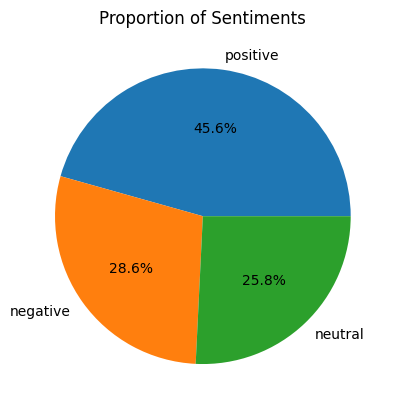

In [ ]:
sentiment_proportions = df1['Sentiment'].value_counts(normalize=True)
plt.pie(sentiment_proportions, labels=sentiment_proportions.index, autopct='%1.1f%%')
plt.title('Proportion of Sentiments')
plt.show()

The maximum portion of 45.6% of the sentiments fall under positive

Scatter Plot

In [ ]:
df1['Tweet Length'] = df1['Tweet Content'].apply(len)

# Scatter plot: Tweet Length vs. Sentiment
plt.scatter(df1['Tweet Length'], df1['Sentiment'])
plt.title('Tweet Length vs. Sentiment')
plt.xlabel('Tweet Length')
plt.ylabel('Sentiment')
plt.show()

## **KNN ANALYSIS**

In [ ]:
X = df1["Tweet Content"]
y = df1["Sentiment"]

Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


Standardization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Applying KNN model to training data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Adjust k as needed
knn_classifier.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

Applying the test data

In [ ]:
from sklearn.metrics import classification_report
y_pred = knn_classifier.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.83      0.70      0.76      6354
     neutral       0.55      0.89      0.68      5715
    positive       0.93      0.71      0.80     10336

    accuracy                           0.75     22405
   macro avg       0.77      0.77      0.75     22405
weighted avg       0.80      0.75      0.76     22405





**Overall Performance:**

* **Accuracy:** The model achieves an accuracy of 75% on the test dataset. This means it correctly classified 75% of the tweets in terms of sentiment (negative, neutral, positive).
* **Weighted Average:** Looking at the weighted average (which considers the class distribution), the model has a precision of 0.80, recall of 0.75, and F1-score of 0.76.

**Class-wise Performance:**

* **Positive:** The model performs well in identifying positive tweets with a precision of 0.93 and F1-score of 0.80. This suggests it rarely mistakes other sentiments for positive and captures most positive tweets accurately.
* **Negative:** The model's performance is weaker for negative tweets, with a precision of 0.83 and F1-score of 0.76. It might be misclassifying some negative tweets as neutral or positive.
* **Neutral:** The model struggles the most with neutral tweets, having a precision of 0.55 and F1-score of 0.68. It might be assigning neutral sentiment to tweets that are actually positive or negative.

**Inference:**

The model shows a decent overall accuracy but seems to have difficulty classifying neutral tweets accurately. It might be biased towards classifying tweets as positive or negative. Here are some possible improvements:

* **Data Balancing:** If the training data has an uneven distribution of positive, negative, and neutral tweets, consider balancing the data to improve performance on under-represented classes (e.g., neutral tweets).
* **Feature Engineering:** Explore different text pre-processing and feature extraction techniques to capture more informative features from the tweets, potentially improving classification accuracy.
* **Model Tuning:** Experiment with different hyperparameters for the sentiment analysis model to see if it can improve performance, especially for neutral sentiment.

Overall, the model provides a reasonable starting point for sentiment analysis, but there's room for improvement, particularly in handling neutral tweets.


In [ ]:
knn_classifier.score(X_test_tfidf, y_test)

0.7516625753180094

k=3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # Adjust k as needed
knn_classifier.fit(X_train_tfidf, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_classifier.score(X_test_tfidf, y_test)

0.8374023655434055

k=7

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=7)  # Adjust k as needed
knn_classifier.fit(X_train_tfidf, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn_classifier.score(X_test_tfidf, y_test)

0.6130328051774158

Clearly we see that the score at k=5 was 0.7516625753180094 and k=3 was 0.8374023655434055 and k=7 was 0.6130328051774158, we can observe that the accuracy score is decreasing as the k value is increased , and the maximum accuracy is obtained at k=3

Plot Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn_classifier.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred)
cm

array([[4469, 1563,  322],
       [ 368, 5078,  269],
       [ 519, 2523, 7294]])

Text(58.222222222222214, 0.5, 'Truth')

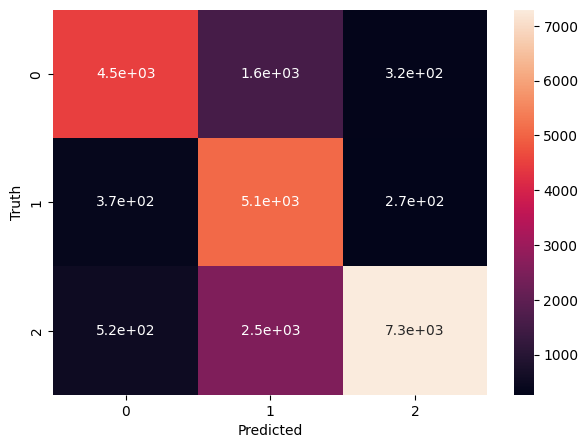

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Print the number of correct and wrong predictions

In [ ]:
num_wrong_pred = (y_pred != y_test).sum()
num_right_pred = (y_pred == y_test).sum()
print(f'Number of wrong predictions: {num_wrong_pred}')
print(f'Number of right predictions: {num_right_pred}')

Number of wrong predictions: 5564
Number of right predictions: 16841


Using Manhattan Distance

In [ ]:
def manhattan_distance(x1, x2):
   return np.sum(np.abs(x1 - x2))

knn_e= KNeighborsClassifier(metric=manhattan_distance)
knn_e.fit(X_train_tfidf, y_train)
y_pred_m = knn_e.predict(X_test_tfidf)

print("Classification Report")
print(classification_report(y_test,y_pred_m))

print("Number of Correct and Wrong predictions")
num_wrong_pred = (y_pred_m != y_test).sum()
num_right_pred = (y_pred_m == y_test).sum()
print(f'Number of wrong predictions: {num_wrong_pred}')
print(f'Number of right predictions: {num_right_pred}')

print("Confusion Matrix")
y_pred = knn_classifier.predict(X_test_tfidf)
cm1 = confusion_matrix(y_test, y_pred_m)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Cosine Similarity

In [ ]:
def cosine_similarity(x1, x2):
  return 1- (np.dot(x1, x2) / (np.sqrt(np.dot(x1, x1)) * np.sqrt(np.dot(x2, x2))))

knn_c= KNeighborsClassifier(metric=cosine_similarity)
knn_c.fit(X_train_tfidf, y_train)
y_pred_c = knn_c.predict(X_test_tfidf)

print("Classification Report")
print(classification_report(y_test,y_pred_c))

print("Number of Correct and Wrong predictions")
num_wrong_pred = (y_pred_c != y_test).sum()
num_right_pred = (y_pred_c == y_test).sum()
print(f'Number of wrong predictions: {num_wrong_pred}')
print(f'Number of right predictions: {num_right_pred}')

print("Confusion Matrix")
y_pred = knn_classifier.predict(X_test)
cm_c = confusion_matrix(y_test, y_pred_c)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm_c, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')